<a href="https://colab.research.google.com/github/ekito-station/iris-classification/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

サポートベクターマシン（SVM）を使って、アヤメの品種を分類する。

## 0. ライブラリ・データの読み込み

In [ ]:
# ライブラリの読み込み
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl

In [ ]:
# データの読み込み
from sklearn.datasets import load_iris
iris = load_iris()

## 1. データの概観

In [ ]:
# DataFrameに読み込み
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# DataFrameの一部を確認
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
# DataFrameの要約情報を確認
df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [ ]:
# DataFrameの行数・列数を確認
df.shape

(150, 4)

In [ ]:
# DataFrameの要約統計量を確認
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2. 機械学習モデルの構築・学習

In [ ]:
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# クラスの初期化と学習
model = SVC()
model.fit(X_train_std, y_train)

# 学習データからの予測値
pred_train = model.predict(X_train_std)
# テストデータからの予測値
pred_test = model.predict(X_test_std)

# 評価
print('正解率(train): {:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test) : {:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train): 0.973
正解率(test) : 0.974


## 3. (おまけ) 各品種の割合をグラフ化

SVMを使って分類された品種の割合をグラフ化する。ちなみに、100%正しい分類の場合は33.3%ずつになる。

In [ ]:
# グラフのスタイルの設定
title_size = 30
font_size = 20
label = ["Setosa", "Versicolor", "Versinica"]

mpl.rc('axes', titlesize=title_size)
mpl.rc('xtick', labelsize=font_size)
mpl.rc('ytick', labelsize=font_size)
text = {
    'fontsize': font_size
}

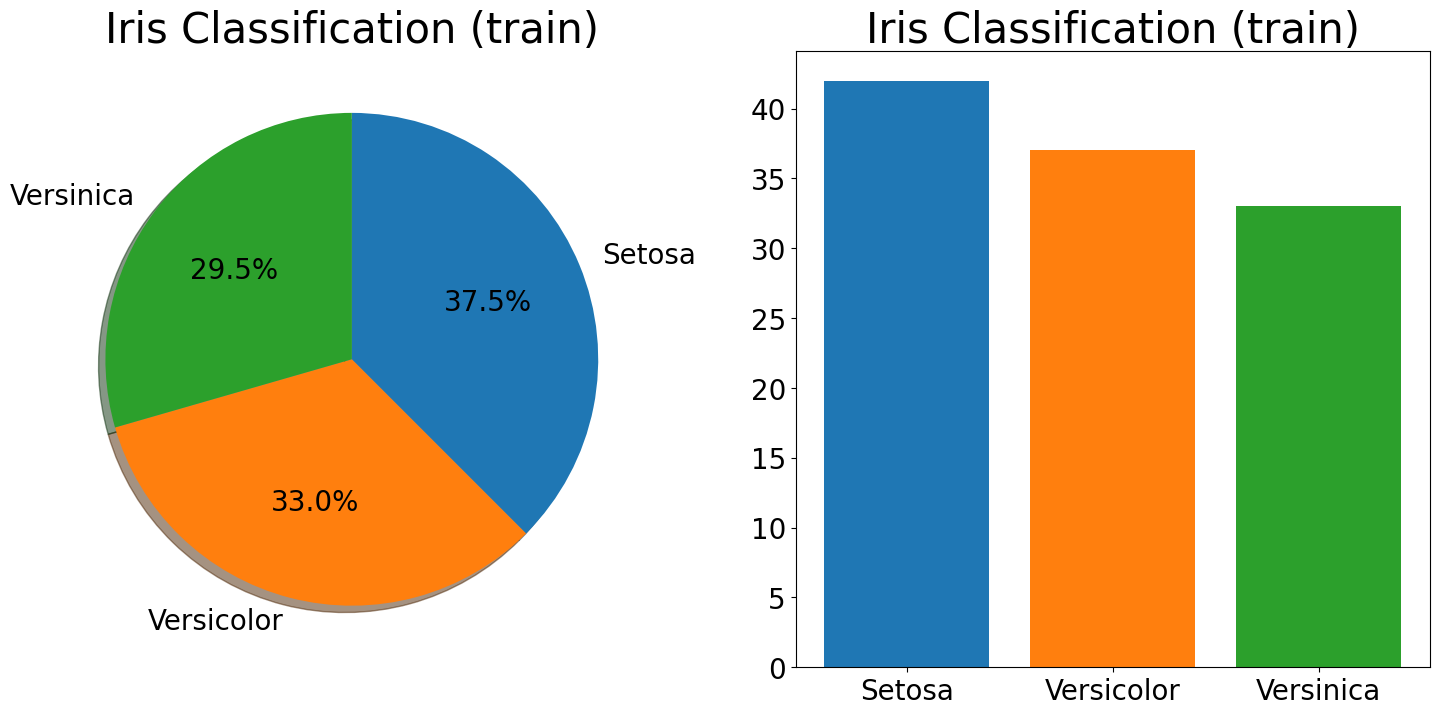

In [ ]:
# 学習データからの予測値をグラフ化
f_train, ax_train = plt.subplots(1,2,figsize=(18,8))
counts_train = pd.DataFrame(pred_train).value_counts()
counts_train.plot.pie(labels=label, autopct='%1.1f%%', ax=ax_train[0], shadow=True, counterclock=False, startangle=90, textprops=text)
ax_train[0].set_title('Iris Classification (train)')
ax_train[0].set_ylabel('')
plt.bar([1,2,3], counts_train, tick_label=label, color=mcolors.TABLEAU_COLORS)
ax_train[1].set_title('Iris Classification (train)')
plt.show()

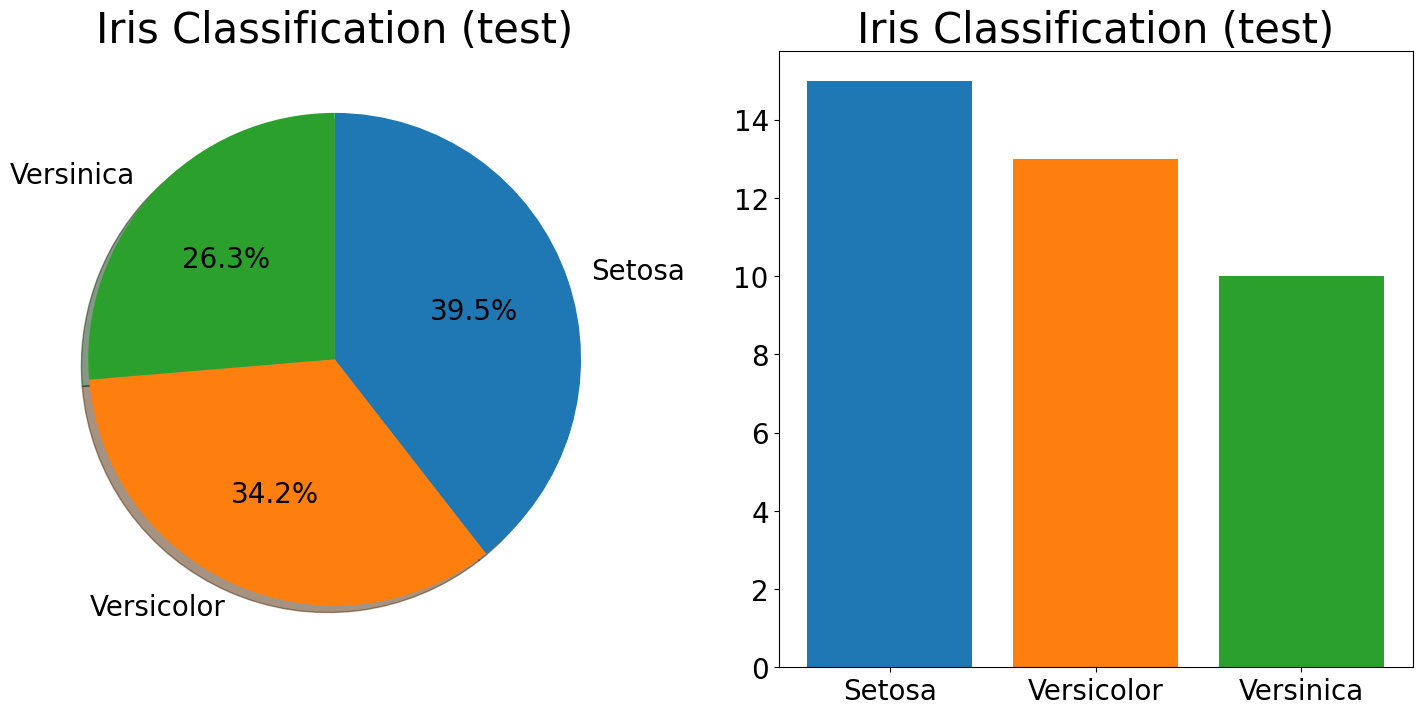

In [ ]:
# テストデータからの予測値をグラフ化
f_test, ax_test = plt.subplots(1,2,figsize=(18,8))
counts_test = pd.DataFrame(pred_test).value_counts()
counts_test.plot.pie(labels=label, autopct='%1.1f%%', ax=ax_test[0], shadow=True, counterclock=False, startangle=90, textprops=text)
ax_test[0].set_title('Iris Classification (test)')
ax_test[0].set_ylabel('')
plt.bar([1,2,3], counts_test, tick_label=label, color=mcolors.TABLEAU_COLORS)
ax_test[1].set_title('Iris Classification (test)')
plt.show()

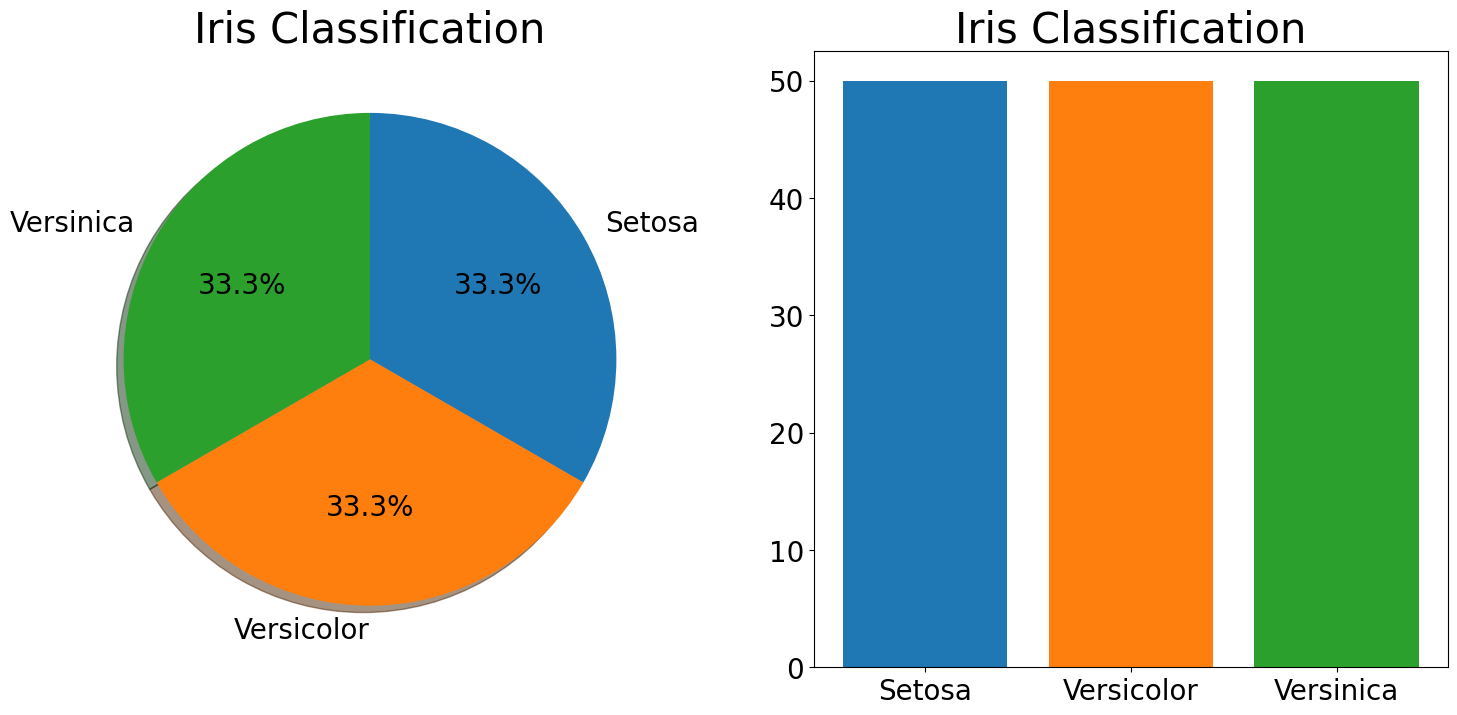

In [ ]:
# 正解値をグラフ化
f, ax = plt.subplots(1,2,figsize=(18,8))
counts = pd.DataFrame(iris.target).value_counts()
counts.plot.pie(labels=label, autopct='%1.1f%%', ax=ax[0], shadow=True, counterclock=False, startangle=90, textprops=text)
ax[0].set_title('Iris Classification')
ax[0].set_ylabel('')
plt.bar([1,2,3], counts, tick_label=label, color=mcolors.TABLEAU_COLORS)
ax[1].set_title('Iris Classification')
plt.show()